In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<p style="font-family: Arial, sans-serif;">
    <b style="color:black;">Age</b>: age of the patient [years] <br><br>
    <b style="color:black;">Sex</b>: sex of the patient [M: Male, F: Female] <br><br>
    <b style="color:black;">ChestPainType</b>: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] <br><br>
    <b style="color:black;">RestingBP</b>: resting blood pressure [mm Hg] <br><br>
    <b style="color:black;">Cholesterol</b>: serum cholesterol [mm/dl] <br><br>
    <b style="color:black;">FastingBS</b>: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] <br><br>
    <b style="color:black;">RestingECG</b>: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] <br><br>
    <b style="color:black;">MaxHR</b>: maximum heart rate achieved [Numeric value between 60 and 202] <br><br>
    <b style="color:black;">ExerciseAngina</b>: exercise-induced angina [Y: Yes, N: No] <br><br>
    <b style="color:black;">Oldpeak</b>: oldpeak = ST [Numeric value measured in depression] <br><br>
    <b style="color:black;">ST_Slope</b>: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] <br><br>
    <b style="color:black;">HeartDisease</b>: output class [1: heart disease, 0: Normal]
</p>


In [4]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
311,60,M,ASY,125,0,1,Normal,110,N,0.1,Up,1
231,40,M,NAP,130,281,0,Normal,167,N,0.0,Up,0
177,59,M,ATA,140,287,0,Normal,150,N,0.0,Up,0
760,53,M,ASY,123,282,0,Normal,95,Y,2.0,Flat,1
66,45,F,ASY,132,297,0,Normal,144,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['str_HeartDisease']=df['HeartDisease'].map({1:'heart disease',0:'Normal'})

In [11]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,str_HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Normal
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,heart disease
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Normal
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,heart disease
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,heart disease
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,heart disease
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,heart disease
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,heart disease


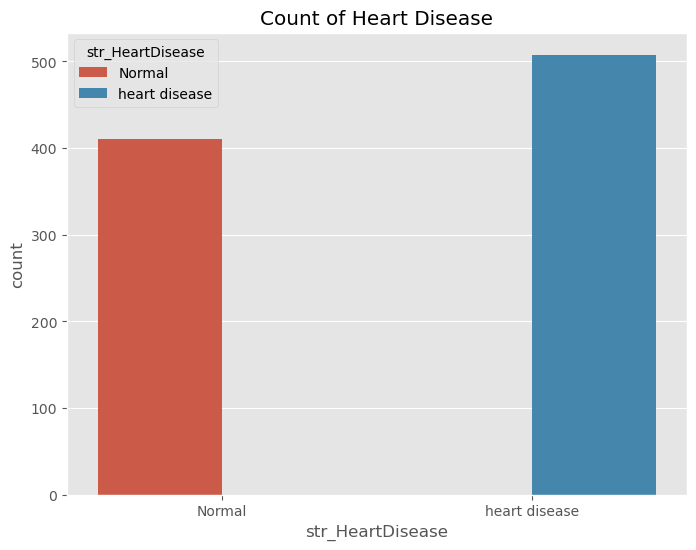

In [12]:

plt.figure(figsize=(8,6))
plt.title("Count of Heart Disease")
sns.countplot(data=df,x='str_HeartDisease',hue='str_HeartDisease')
plt.show()

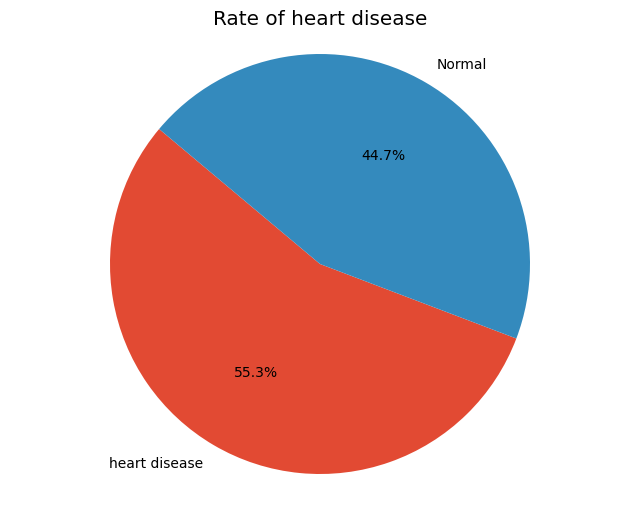

In [13]:

x=df['str_HeartDisease'].value_counts()
plt.figure(figsize=(8, 6))
plt.title("Rate of heart disease")
plt.pie(x,labels=x.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.show()

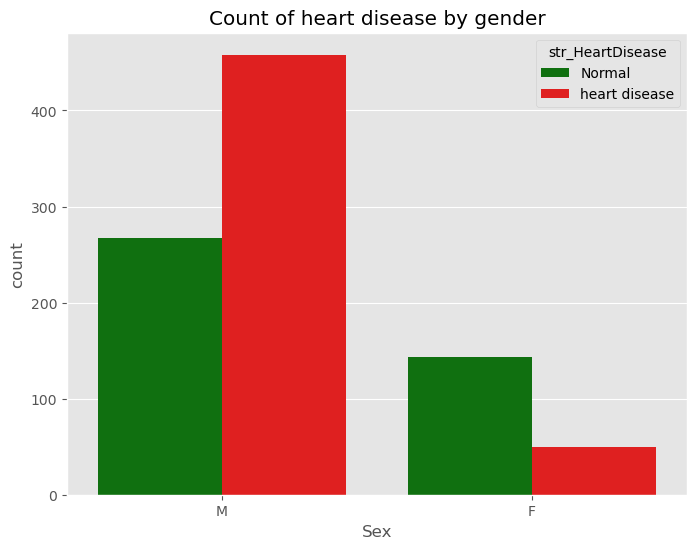

In [14]:
plt.figure(figsize=(8,6))
plt.title('Count of heart disease by gender')
sns.countplot(x='Sex',hue='str_HeartDisease',data=df, palette=[ 'green','red'])
plt.show()

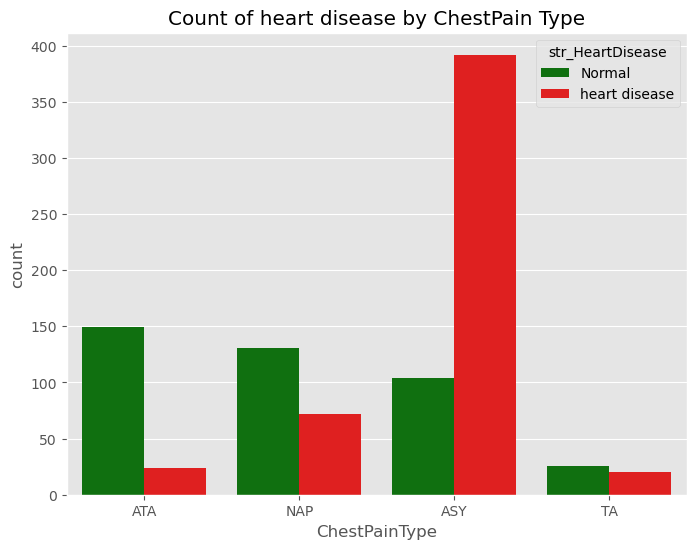

In [15]:
plt.figure(figsize=(8,6))
plt.title('Count of heart disease by ChestPain Type')
sns.countplot( x='ChestPainType',hue='str_HeartDisease', data=df, palette=[ 'green','red'])
plt.show()

In [16]:
cols=df.select_dtypes(include=['number']).columns

In [17]:
ncol=cols.drop('HeartDisease')

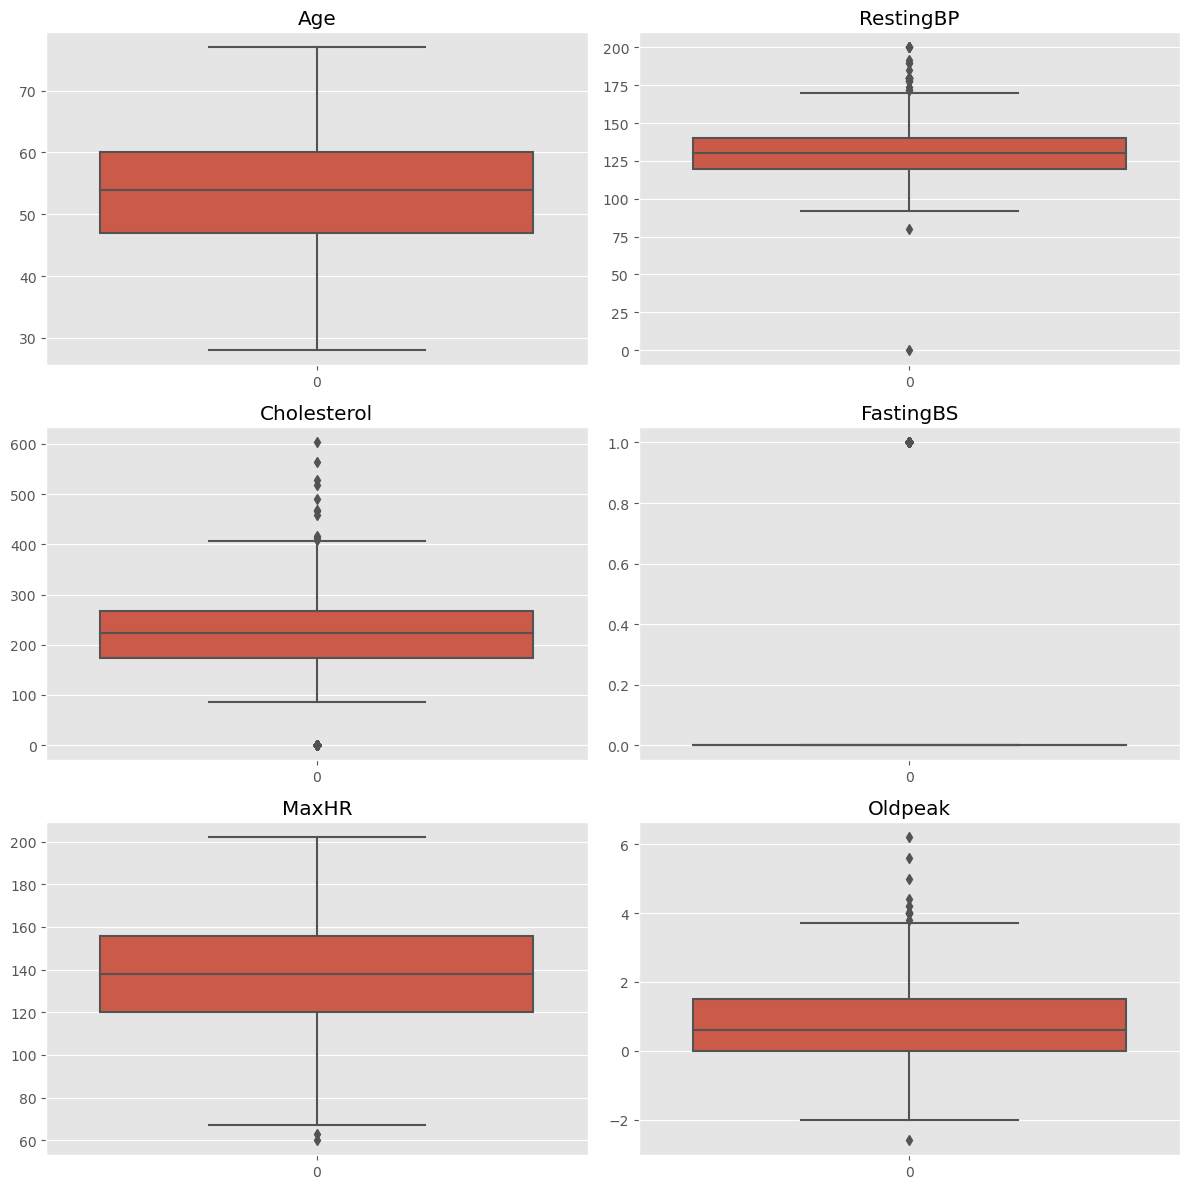

In [18]:
plt.figure(figsize=(12,12))
for i,col in enumerate(ncol,start=1):
    plt.subplot(3,2,i)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [19]:
def handle_outliers(column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  low_bound = Q1 - 1.5*IQR
  high_bound = Q3 + 1.5*IQR
  df[column] = df[column].clip(lower = low_bound, upper = high_bound)

for column in cols:
  handle_outliers(column)

In [20]:
df.drop('RestingECG',axis=1,inplace=True)
df.drop('FastingBS',axis=1,inplace=True)
df.drop('str_HeartDisease',axis=1,inplace=True)

In [21]:
str_cols=df.select_dtypes(include=['object']).columns

In [22]:
str_cols

Index(['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [24]:
le=LabelEncoder()

In [25]:
for col in str_cols:
    df[col]=le.fit_transform(df[col])

In [26]:
df.duplicated().sum()

1

In [27]:
scaler=MinMaxScaler() 

In [28]:
df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.333333,0.625,0.683667,0.779412,0.0,0.375000,1.0,0.0
1,0.428571,0.0,0.666667,0.875,0.393000,0.661765,0.0,0.541667,0.5,1.0
2,0.183673,1.0,0.333333,0.500,0.667667,0.235294,0.0,0.375000,1.0,0.0
3,0.408163,0.0,0.000000,0.600,0.483667,0.308824,1.0,0.625000,0.5,1.0
4,0.530612,1.0,0.666667,0.750,0.433000,0.411765,0.0,0.375000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1.0,1.000000,0.250,0.617000,0.485294,0.0,0.575000,0.5,1.0
914,0.816327,1.0,0.000000,0.675,0.427667,0.551471,0.0,0.941667,0.5,1.0
915,0.591837,1.0,0.000000,0.500,0.262333,0.360294,1.0,0.575000,0.5,1.0
916,0.591837,0.0,0.333333,0.500,0.542333,0.794118,0.0,0.375000,0.5,1.0


In [29]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 9)
(184, 9)
(734,)
(184,)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
lr=LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
ypredlr_test=lr.predict(x_test)
accuracy1_test = accuracy_score(y_test, ypredlr_test)
print(f"Accuracy test: {round(accuracy1_test * 100,2)}%")


Accuracy test: 83.15%


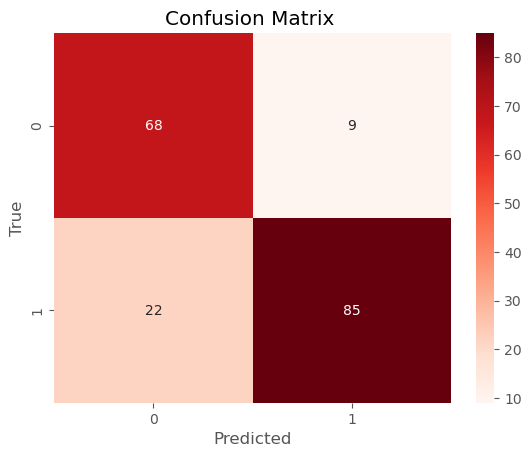

In [35]:
conf_matrix = confusion_matrix(y_test, ypredlr_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

In [36]:
svc = SVC(random_state=42)
svc.fit(x_train, y_train)

SVC(random_state=42)

In [37]:
ypredsvm_test = svc.predict(x_test)
accuracy2_test = accuracy_score(y_test, ypredsvm_test)
print(f"Test Accuracy: {round(accuracy2_test * 100,2)}%")


Test Accuracy: 85.33%


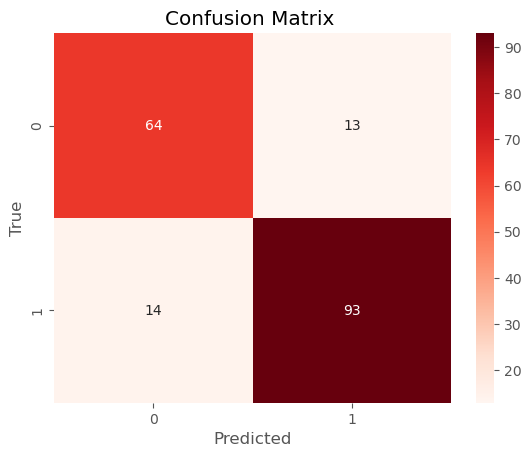

In [38]:
conf_matrix = confusion_matrix(y_test, ypredsvm_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

In [39]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()


In [40]:
GNB.fit(x_train,y_train)

GaussianNB()

In [41]:
ypredgnb_test = GNB.predict(x_test)
accuracy3_test = accuracy_score(y_test, ypredgnb_test)
print(f"Test Accuracy: {round(accuracy3_test * 100,2)}%")


Test Accuracy: 79.89%


In [42]:
from sklearn.model_selection import cross_val_score, KFold
mods = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Gaussian Naive Bayes": GaussianNB()
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
crossval=[]
for model_name, model in mods.items():
    scores = cross_val_score(model, x, y, cv=kf)
    crossval.append(scores.mean())
    print(f"Model: {model_name}")
    print("Cross-validation scores:", scores)
    print("Mean accuracy:", scores.mean())
    
    print()

Model: Logistic Regression
Cross-validation scores: [0.83152174 0.875      0.88586957 0.82513661 0.83060109]
Mean accuracy: 0.8496258018531717

Model: Support Vector Classifier
Cross-validation scores: [0.85326087 0.89130435 0.89673913 0.82513661 0.85245902]
Mean accuracy: 0.8637799952482774

Model: Gaussian Naive Bayes
Cross-validation scores: [0.79891304 0.89130435 0.875      0.81420765 0.86338798]
Mean accuracy: 0.8485626039439296



In [43]:
crossval

[0.8496258018531717, 0.8637799952482774, 0.8485626039439296]

In [44]:
models=pd.DataFrame({'Model':
                     ['Logistic Regression','SVM','GuassianNB'],
                     'Accuracy':
                     [accuracy1_test,accuracy2_test,accuracy3_test],
                     'Cross Validation':
                     crossval
                     })

In [45]:
models

,Model,Accuracy,Cross Validation
0,Logistic Regression,0.831522,0.849626
1,SVM,0.853261,0.863780
2,GuassianNB,0.798913,0.848563


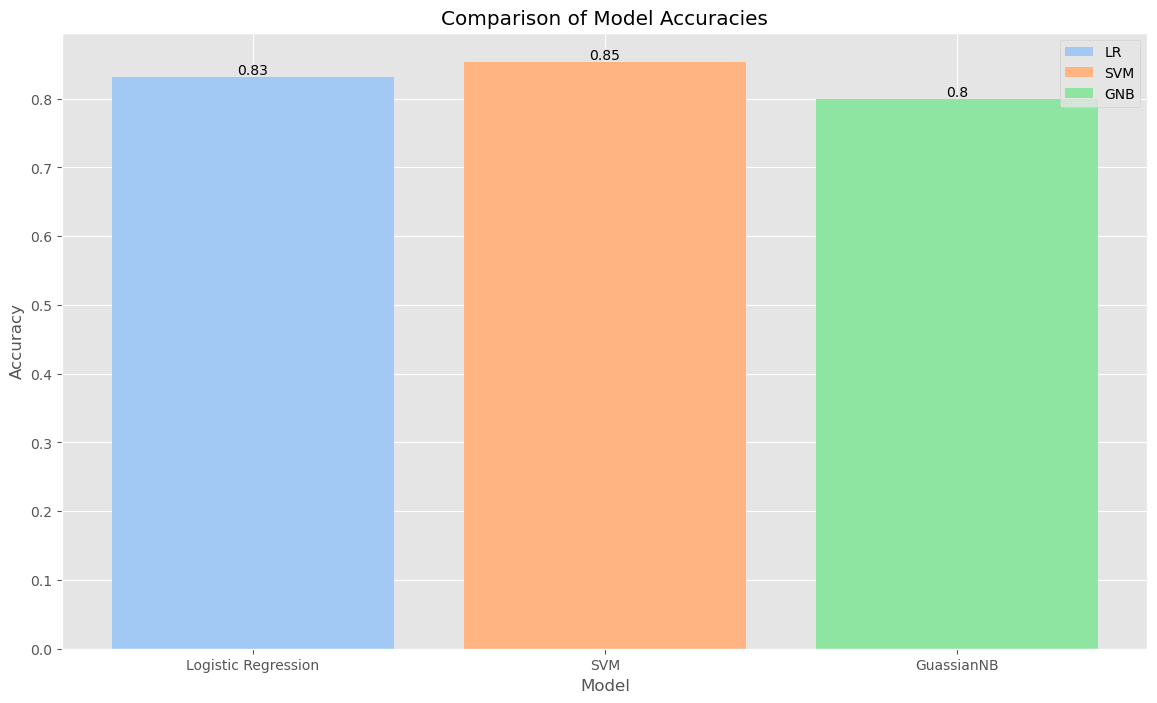

In [46]:
colors = sns.color_palette("pastel")
plt.figure(figsize = (14, 8))
bars = plt.bar(models['Model'], models['Accuracy'], color=colors, label=['LR', 'SVM', 'GNB'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.legend(loc='upper right')
plt.show()

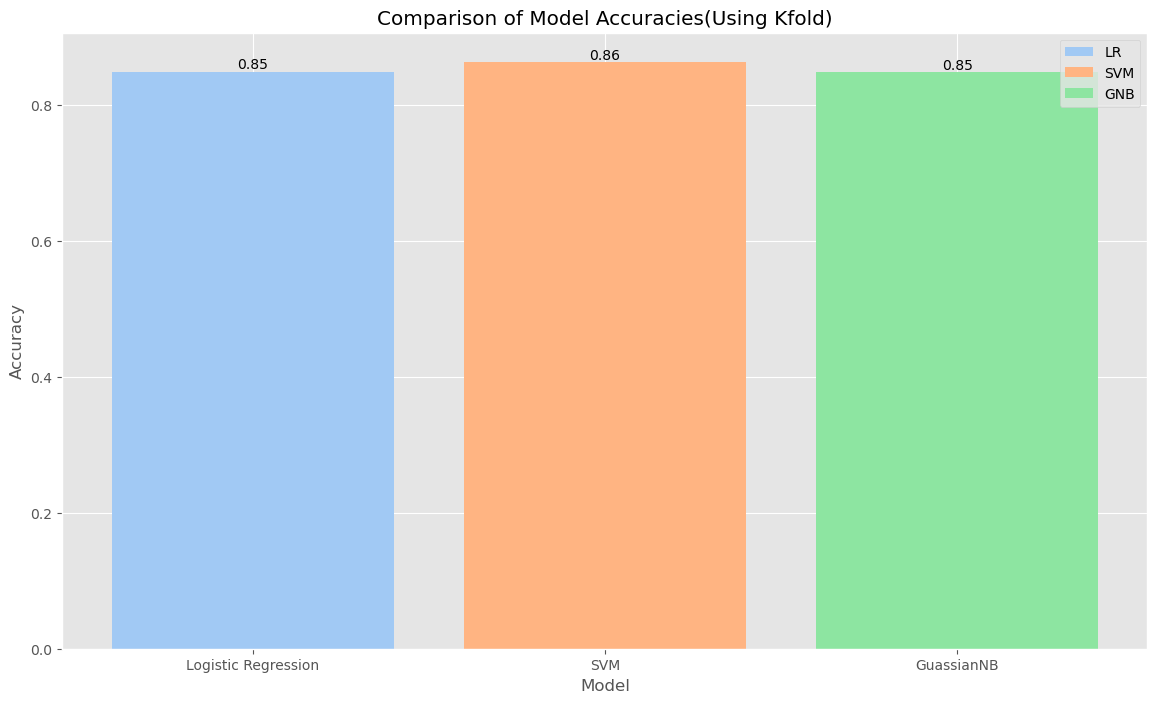

In [47]:

plt.figure(figsize = (14, 8))
bars = plt.bar(models['Model'], models['Cross Validation'], color=colors, label=['LR', 'SVM', 'GNB'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
plt.title('Comparison of Model Accuracies(Using Kfold)')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.legend(loc='upper right')
plt.show()
